# Exam Predictions

The purpose of this analysis to experiment with machine learning methods. I will be using a dataset that records the exam scores in multiple categories. 

## Data Info

[Link](https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams)

In [1]:
install.packages("ggfortify")

suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(readr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(ggfortify))
suppressPackageStartupMessages(library(broom))


The downloaded binary packages are in
	/var/folders/gm/2375ng390_b6r6sfvhbytn880000gn/T//RtmpPw6mhL/downloaded_packages


In [2]:
exams <- read_csv("exams.csv")


Rows: 1000 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): gender, race/ethnicity, parental level of education, lunch, test pr...
dbl (3): math score, reading score, writing score

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Data Cleaning

In [3]:
exams <- exams %>%
    rename(
        "race_ethnicity" = "race/ethnicity",
        "parent_edu" = "parental level of education",
        "math_score" = "math score",
        "read_score" = "reading score",
        "write_score" = "writing score",
        "test_prep_course" = "test preparation course"
    )
glimpse(exams)

Rows: 1,000
Columns: 8
$ gender           <chr> "male", "female", "male", "male", "male", "female", "…
$ race_ethnicity   <chr> "group A", "group D", "group E", "group B", "group E"…
$ parent_edu       <chr> "high school", "some high school", "some college", "h…
$ lunch            <chr> "standard", "free/reduced", "free/reduced", "standard…
$ test_prep_course <chr> "completed", "none", "none", "none", "completed", "no…
$ math_score       <dbl> 67, 40, 59, 77, 78, 63, 62, 93, 63, 47, 99, 80, 77, 7…
$ read_score       <dbl> 67, 59, 60, 78, 73, 77, 59, 88, 56, 42, 83, 87, 87, 7…
$ write_score      <dbl> 63, 55, 50, 68, 68, 76, 63, 84, 65, 45, 85, 90, 85, 7…


In [4]:
male_vs_female <- exams %>% 
    group_by(gender) %>%
    summarize(
        mean_math = mean(math_score),
        mean_read = mean(read_score),
        mean_write = mean(write_score),
        sample_size = n()
        )
male_vs_female


gender,mean_math,mean_read,mean_write,sample_size
<chr>,<dbl>,<dbl>,<dbl>,<int>
female,63.19669,71.88820,71.70807,483
male,69.38491,66.30561,64.02901,517


## Dummy variables
* **Gender**
    + Male = 1, Female = 0
* **Race/Ethnicity**
    + groupA = 1, groupB = 2, groupC = 3, groupD = 4, groupE = 5
* **Parent Level of Education**
    + some high school = 1, high school = 2, some college = 3, associate's degree = 4, bachelor's degree = 5, master's degree = 6
* **Lunch**
    + standard = 1, reduced/free = 0

### Gender

In [5]:
exams_clean <- exams
exams_clean$gender <- ifelse(exams_clean$gender == "male", 1, 0) 
exams_clean$gender <- as.numeric(exams_clean$gender)

### Race/Ethnicity

In [6]:
unique(exams_clean$race_ethnicity)

[1] "group A" "group D" "group E" "group B" "group C"

In [7]:

exams_clean$race_ethnicity <- ifelse(exams_clean$race_ethnicity == "group A", 1, exams_clean$race_ethnicity)
exams_clean$race_ethnicity <- ifelse(exams_clean$race_ethnicity == "group B", 2, exams_clean$race_ethnicity)
exams_clean$race_ethnicity <- ifelse(exams_clean$race_ethnicity == "group C", 3, exams_clean$race_ethnicity)
exams_clean$race_ethnicity <- ifelse(exams_clean$race_ethnicity == "group D", 4, exams_clean$race_ethnicity)
exams_clean$race_ethnicity <- ifelse(exams_clean$race_ethnicity == "group E", 5, exams_clean$race_ethnicity)

exams_clean$race_ethnicity <- as.numeric(exams_clean$race_ethnicity)


### Parental level of Education

In [8]:
unique(exams_clean$parent_edu)

[1] "high school"        "some high school"   "some college"      
[4] "associate's degree" "bachelor's degree"  "master's degree"

In [9]:
exams_clean$parent_edu <- ifelse(exams_clean$parent_edu == "some high school", 1, exams_clean$parent_edu)
exams_clean$parent_edu <- ifelse(exams_clean$parent_edu == "high school", 2, exams_clean$parent_edu)
exams_clean$parent_edu <- ifelse(exams_clean$parent_edu == "some college", 3, exams_clean$parent_edu)
exams_clean$parent_edu <- ifelse(exams_clean$parent_edu == "associate\'s degree", 4, exams_clean$parent_edu)
exams_clean$parent_edu <- ifelse(exams_clean$parent_edu == "bachelor\'s degree", 5, exams_clean$parent_edu)
exams_clean$parent_edu <- ifelse(exams_clean$parent_edu == "master\'s degree", 6, exams_clean$parent_edu)

exams_clean$parent_edu <- as.numeric(exams_clean$parent_edu)

In [10]:
str(exams_clean)

spec_tbl_df [1,000 × 8] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ gender          : num [1:1000] 1 0 1 1 1 0 0 1 1 1 ...
 $ race_ethnicity  : num [1:1000] 1 4 5 2 5 4 1 5 4 3 ...
 $ parent_edu      : num [1:1000] 2 1 3 2 4 2 5 3 2 3 ...
 $ lunch           : chr [1:1000] "standard" "free/reduced" "free/reduced" "standard" ...
 $ test_prep_course: chr [1:1000] "completed" "none" "none" "none" ...
 $ math_score      : num [1:1000] 67 40 59 77 78 63 62 93 63 47 ...
 $ read_score      : num [1:1000] 67 59 60 78 73 77 59 88 56 42 ...
 $ write_score     : num [1:1000] 63 55 50 68 68 76 63 84 65 45 ...
 - attr(*, "spec")=
  .. cols(
  ..   gender = col_character(),
  ..   `race/ethnicity` = col_character(),
  ..   `parental level of education` = col_character(),
  ..   lunch = col_character(),
  ..   `test preparation course` = col_character(),
  ..   `math score` = col_double(),
  ..   `reading score` = col_double(),
  ..   `writing score` = col_double()
  .. )
 - attr(*, "problems")=<extern

### Lunch

In [11]:
exams_clean$lunch <- ifelse(exams_clean$lunch == "standard", 1, 0)

exams_clean$lunch <- as.numeric(exams_clean$lunch)

### Test Prep Course

In [12]:

exams_clean$test_prep_course <- ifelse(exams_clean$test_prep_course == "completed", 1, 0)

exams_clean$test_prep_course <- as.numeric(exams_clean$test_prep_course)

## Re-evaluate new data

### Cumulative test score predictions

In [13]:
str(exams_clean)

spec_tbl_df [1,000 × 8] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ gender          : num [1:1000] 1 0 1 1 1 0 0 1 1 1 ...
 $ race_ethnicity  : num [1:1000] 1 4 5 2 5 4 1 5 4 3 ...
 $ parent_edu      : num [1:1000] 2 1 3 2 4 2 5 3 2 3 ...
 $ lunch           : num [1:1000] 1 0 0 1 1 1 1 1 1 0 ...
 $ test_prep_course: num [1:1000] 1 0 0 0 1 0 0 1 0 0 ...
 $ math_score      : num [1:1000] 67 40 59 77 78 63 62 93 63 47 ...
 $ read_score      : num [1:1000] 67 59 60 78 73 77 59 88 56 42 ...
 $ write_score     : num [1:1000] 63 55 50 68 68 76 63 84 65 45 ...
 - attr(*, "spec")=
  .. cols(
  ..   gender = col_character(),
  ..   `race/ethnicity` = col_character(),
  ..   `parental level of education` = col_character(),
  ..   lunch = col_character(),
  ..   `test preparation course` = col_character(),
  ..   `math score` = col_double(),
  ..   `reading score` = col_double(),
  ..   `writing score` = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


In [14]:
df1 <- exams_clean %>%
    mutate(
        cum_score = math_score + read_score + write_score
    )
df1 <- df1[-c(6:8)]
str(df1)

tibble [1,000 × 6] (S3: tbl_df/tbl/data.frame)
 $ gender          : num [1:1000] 1 0 1 1 1 0 0 1 1 1 ...
 $ race_ethnicity  : num [1:1000] 1 4 5 2 5 4 1 5 4 3 ...
 $ parent_edu      : num [1:1000] 2 1 3 2 4 2 5 3 2 3 ...
 $ lunch           : num [1:1000] 1 0 0 1 1 1 1 1 1 0 ...
 $ test_prep_course: num [1:1000] 1 0 0 0 1 0 0 1 0 0 ...
 $ cum_score       : num [1:1000] 197 154 169 223 219 216 184 265 184 134 ...


In [15]:
# Training vs testing dataset
test <- df1[250:350,]
train <- df1[-c(250:350),]

In [16]:
lm1 <- lm(cum_score ~ ., data = train)
summary(lm1)


Call:
lm(formula = cum_score ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-112.829  -25.130    0.927   27.612   87.419 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      130.0876     5.0859  25.578  < 2e-16 ***
gender            -7.1504     2.4891  -2.873  0.00417 ** 
race_ethnicity     8.0240     1.0968   7.316  5.7e-13 ***
parent_edu         7.8898     0.8251   9.562  < 2e-16 ***
lunch             30.5793     2.6059  11.735  < 2e-16 ***
test_prep_course  21.6074     2.6180   8.253  5.5e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 37.17 on 893 degrees of freedom
Multiple R-squared:  0.2871,	Adjusted R-squared:  0.2831 
F-statistic: 71.93 on 5 and 893 DF,  p-value: < 2.2e-16


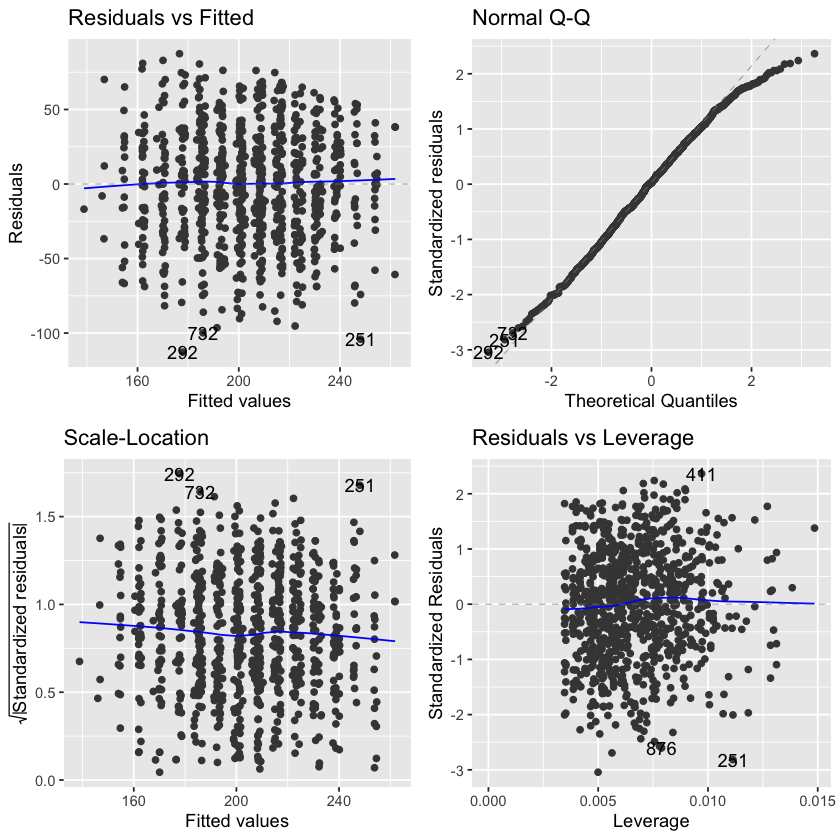

In [17]:
autoplot(lm1)

In [18]:
preds1 <- predict(lm1, test)
preds1 - test$cum_score
mean(preds1-test$cum_score)

1           2           3           4           5           6 
-43.2572301  -8.1470488 -45.5456715   2.5022770   7.2741560   3.9391582 
          7           8           9          10          11          12 
 22.6526485 -31.0103711   1.6766227 -58.9746347 -40.6498425 -15.4192743 
         13          14          15          16          17          18 
 65.5184929  23.5022770  27.1717330 -44.8903354 -14.4977230  -6.8522412 
         19          20          21          22          23          24 
  4.3221045  23.3843373  14.4562601 -21.3713258   0.6526485  -3.0484652 
         25          26          27          28          29          30 
-69.4335586 -63.7879124 -29.3233773 -22.0368675   6.3460788  56.4945186 
         31          32          33          34          35          36 
  8.9994833 -52.4977230 -53.1969051   7.4123903  57.7025797  31.4342685 
         37          38          39          40          41          42 
-27.8522412 -46.4575328  56.2579401 -47.9506604  15.9515348 -18.8522412 
         43          44          45          46          47          48 
-46.4774284   4.3099673 -27.0368675  52.2160019 -53.3713258  19.9229423 
         49          50          51          52          53          54 
 43.6565628   8.3441471  72.3920957  67.6546312  11.8510195  -3.2112132 
         55          56          57          58          59          60 
 -5.7420599  25.0615517  29.3843373   3.3681214  15.8794476  12.2119232 
         61          62          63          64          65          66 
  4.6449651  -3.8002140  46.6286742  37.5684241  -6.0867237   7.1477588 
         67          68          69          70          71          72 
-28.0944821  33.1258805 -48.7420599 -68.9266862 -37.7180856  37.4441229 
         73          74          75          76          77          78 
-23.5636354  48.5184929 -11.2208793 -49.4737487   1.6286742 -41.8481625 
         79          80          81          82          83          84 
 -7.5294556  23.3099673  49.7791207 -16.7420599 -33.7839981  48.2579401 
         85          86          87          88          89          90 
-67.4977230  62.3681214  12.7551464   9.7025797  45.9871068  28.2981303 
         91          92          93          94          95          96 
-16.9220680  29.6766227   2.8989681   1.5684241  14.6526485 -32.0484652 
         97          98          99         100         101 
  1.7025797 -20.9462066 -30.9001898  23.4123903 -45.7879124

[1] -1.1638

* On average, each prediction was below the actual value by about -1.16

### Individual Test Score Predictions

#### Math
* Adj.R^2 = 0.2758
* RSE = 12

In [19]:
df2 <- exams_clean[-c(7,8)]
train2 <- df2[c(250:350),]
test2 <- df2[-c(250:350), ] 


In [20]:
lm_math <- lm(math_score ~ ., data = train2)
summary(lm_math)


Call:
lm(formula = math_score ~ ., data = train2)

Residuals:
    Min      1Q  Median      3Q     Max 
-27.368  -7.292  -0.583   8.438  26.090 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       42.5735     5.1757   8.226  1.0e-12 ***
gender             4.2708     2.4298   1.758 0.082026 .  
race_ethnicity     2.2714     1.0971   2.070 0.041126 *  
parent_edu         0.6414     0.8971   0.715 0.476395    
lunch             13.3386     2.5895   5.151  1.4e-06 ***
test_prep_course   9.4896     2.7269   3.480 0.000759 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12 on 95 degrees of freedom
Multiple R-squared:  0.312,	Adjusted R-squared:  0.2758 
F-statistic: 8.617 on 5 and 95 DF,  p-value: 9.202e-07


#### Reading
* Adj.R^2 = 0.2707
* RSE = 13.23

In [21]:
df3 <- exams_clean[-c(6,8)]
str(df3)
train3 <- df3[c(750:850),]
test3 <- df3[-c(750:850),] 

tibble [1,000 × 6] (S3: tbl_df/tbl/data.frame)
 $ gender          : num [1:1000] 1 0 1 1 1 0 0 1 1 1 ...
 $ race_ethnicity  : num [1:1000] 1 4 5 2 5 4 1 5 4 3 ...
 $ parent_edu      : num [1:1000] 2 1 3 2 4 2 5 3 2 3 ...
 $ lunch           : num [1:1000] 1 0 0 1 1 1 1 1 1 0 ...
 $ test_prep_course: num [1:1000] 1 0 0 0 1 0 0 1 0 0 ...
 $ read_score      : num [1:1000] 67 59 60 78 73 77 59 88 56 42 ...


In [22]:
lm_read <- lm(read_score ~ ., data = train3)
summary(lm_read) 


Call:
lm(formula = read_score ~ ., data = train3)

Residuals:
    Min      1Q  Median      3Q     Max 
-30.190  -8.421   2.254   8.603  26.975 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       58.3096     5.4598  10.680  < 2e-16 ***
gender            -7.3719     2.6537  -2.778  0.00659 ** 
race_ethnicity     0.1062     1.1738   0.090  0.92808    
parent_edu         1.6748     0.8258   2.028  0.04536 *  
lunch             11.6378     2.7836   4.181 6.46e-05 ***
test_prep_course   8.3620     2.7752   3.013  0.00331 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.23 on 95 degrees of freedom
Multiple R-squared:  0.3072,	Adjusted R-squared:  0.2707 
F-statistic: 8.423 on 5 and 95 DF,  p-value: 1.258e-06


#### Writing
* Adj.Rsquared = 0.2527
* RSE = 12.83

In [23]:
df4 <- exams_clean[-c(6,7)]
str(df4)
train4 <- df4[c(450:550),]
test4 <- df4[-c(450:550),] 

tibble [1,000 × 6] (S3: tbl_df/tbl/data.frame)
 $ gender          : num [1:1000] 1 0 1 1 1 0 0 1 1 1 ...
 $ race_ethnicity  : num [1:1000] 1 4 5 2 5 4 1 5 4 3 ...
 $ parent_edu      : num [1:1000] 2 1 3 2 4 2 5 3 2 3 ...
 $ lunch           : num [1:1000] 1 0 0 1 1 1 1 1 1 0 ...
 $ test_prep_course: num [1:1000] 1 0 0 0 1 0 0 1 0 0 ...
 $ write_score     : num [1:1000] 63 55 50 68 68 76 63 84 65 45 ...


In [24]:
lm_write <- lm(write_score ~ ., data = train4)
summary(lm_write)


Call:
lm(formula = write_score ~ ., data = train4)

Residuals:
     Min       1Q   Median       3Q      Max 
-28.0077  -8.3453  -0.8761   9.1602  24.4950 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       48.6310     5.6873   8.551 2.05e-13 ***
gender            -9.1723     2.6379  -3.477 0.000766 ***
race_ethnicity     2.1078     1.2346   1.707 0.091031 .  
parent_edu         3.1611     0.8547   3.698 0.000363 ***
lunch              8.8644     2.6521   3.342 0.001189 ** 
test_prep_course   7.4776     2.8012   2.669 0.008936 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.83 on 95 degrees of freedom
Multiple R-squared:  0.2901,	Adjusted R-squared:  0.2527 
F-statistic: 7.763 on 5 and 95 DF,  p-value: 3.691e-06


## Cross-Validation Model

In [25]:
# remember first model--
summary(lm1)


Call:
lm(formula = cum_score ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-112.829  -25.130    0.927   27.612   87.419 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      130.0876     5.0859  25.578  < 2e-16 ***
gender            -7.1504     2.4891  -2.873  0.00417 ** 
race_ethnicity     8.0240     1.0968   7.316  5.7e-13 ***
parent_edu         7.8898     0.8251   9.562  < 2e-16 ***
lunch             30.5793     2.6059  11.735  < 2e-16 ***
test_prep_course  21.6074     2.6180   8.253  5.5e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 37.17 on 893 degrees of freedom
Multiple R-squared:  0.2871,	Adjusted R-squared:  0.2831 
F-statistic: 71.93 on 5 and 893 DF,  p-value: < 2.2e-16


In [26]:
library(caret)
set.seed(5698)
model_cv <- train(
    cum_score ~ ., df1,
    method = "lm",
    trControl = trainControl(
        method = "cv",
        number = 450,
        verboseIter = TRUE
    )
)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




+ Fold001: intercept=TRUE 
- Fold001: intercept=TRUE 
+ Fold002: intercept=TRUE 
- Fold002: intercept=TRUE 
+ Fold003: intercept=TRUE 
- Fold003: intercept=TRUE 
+ Fold004: intercept=TRUE 
- Fold004: intercept=TRUE 
+ Fold005: intercept=TRUE 
- Fold005: intercept=TRUE 
+ Fold006: intercept=TRUE 
- Fold006: intercept=TRUE 
+ Fold007: intercept=TRUE 
- Fold007: intercept=TRUE 
+ Fold008: intercept=TRUE 
- Fold008: intercept=TRUE 
+ Fold009: intercept=TRUE 
- Fold009: intercept=TRUE 
+ Fold010: intercept=TRUE 
- Fold010: intercept=TRUE 
+ Fold011: intercept=TRUE 
- Fold011: intercept=TRUE 
+ Fold012: intercept=TRUE 
- Fold012: intercept=TRUE 
+ Fold013: intercept=TRUE 
- Fold013: intercept=TRUE 
+ Fold014: intercept=TRUE 
- Fold014: intercept=TRUE 
+ Fold015: intercept=TRUE 
- Fold015: intercept=TRUE 
+ Fold016: intercept=TRUE 
- Fold016: intercept=TRUE 
+ Fold017: intercept=TRUE 
- Fold017: intercept=TRUE 
+ Fold018: intercept=TRUE 
- Fold018: intercept=TRUE 
+ Fold019: intercept=TRUE 
-

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


Aggregating results
Fitting final model on full training set


In [27]:
model_cv

Linear Regression 

1000 samples
   5 predictor

No pre-processing
Resampling: Cross-Validated (450 fold) 
Summary of sample sizes: 998, 998, 998, 998, 997, 998, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  33.64692  0.9105358  30.34098

Tuning parameter 'intercept' was held constant at a value of TRUE

In [28]:

df1$pred <- predict(model_cv, df1) 
(mean(df1$cum_score) - mean(df1$pred))

[1] 3.694822e-13

In [29]:
df1 %>%
    summarize(cum_score = cum_score, pred = pred)

cum_score,pred
<dbl>,<dbl>
197,199.9521
154,170.8513
169,186.0275
223,185.4687
219,246.7440
216,209.1311
184,207.7391
265,239.2547
184,201.3754


## Random Tree Method

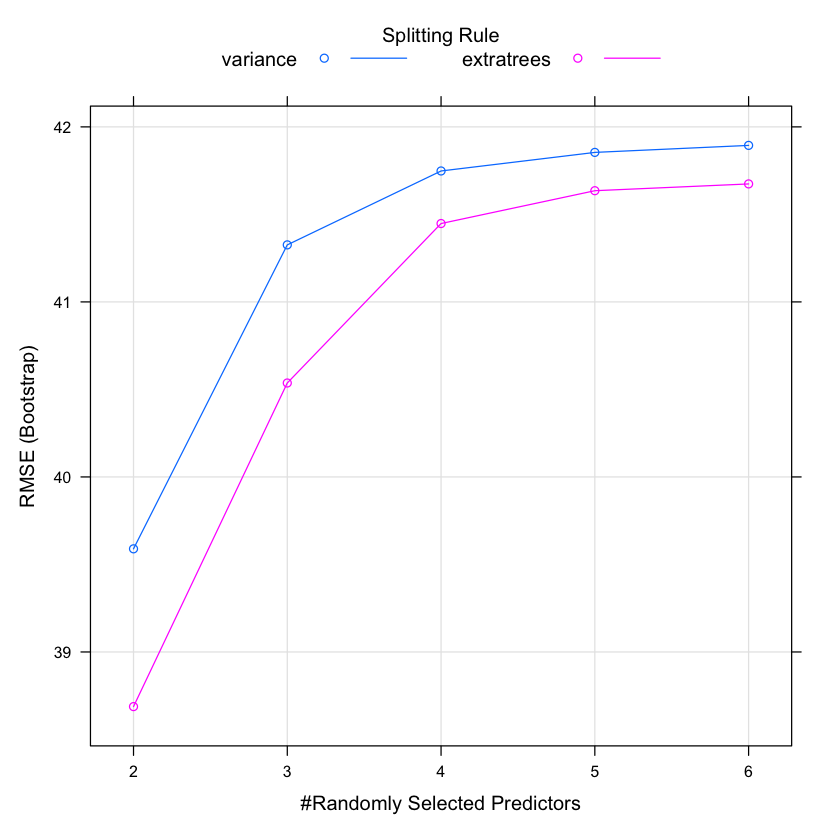

In [39]:
set.seed(10)

model_rt <- train(
    cum_score ~ .,
    data = df1,
    method = "ranger",
    tuneLength = 5
)
plot(model_rt)

In [43]:
predict_rt <- predict(
    model_rt, df1[1:250, ]
)
df1[1:250, ] %>%
    summarize(
        actual = cum_score,
        predict = predict_rt
    )


actual,predict
<dbl>,<dbl>
197,205.9574
154,171.4034
169,193.1883
223,189.7341
219,256.5643
216,214.8798
184,201.4273
265,253.2558
184,203.4728
